In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# De scikit-learn...

In [72]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df_original = pd.read_csv(file_path, sep=',',engine='python')

Item 2.
********************* ANÁLISIS DESCRIPTIVO *********************

In [73]:
# Hacemos primero el filtrado por las ubicaciones de interés para poder tomar decisiones dentro de este dataset y no del general
# Lista de ubicaciones de interés. Agregamos Tuggeranong porque está a 15 km en linea recta de Canberra y podemos utilizar sus datos para completar los incompletos
ubicaciones_permitidas = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport','Tuggeranong']

# Filtramos el DataFrame para quedarnos solo con las ubicaciones permitidas
df = df_original[df_original['Location'].isin(ubicaciones_permitidas)]

### Vista de datos
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
30168,30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
30169,30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
30170,30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
30171,30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6


In [74]:
# Descripción general del conjunto de datos
df.info()
# Las variables de tipo object que son categóricas y las int64 y float64 que son numéricas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19024 entries, 30167 to 70370
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        19024 non-null  int64  
 1   Date              19024 non-null  object 
 2   Location          19024 non-null  object 
 3   MinTemp           18532 non-null  float64
 4   MaxTemp           18534 non-null  float64
 5   Rainfall          18196 non-null  float64
 6   Evaporation       14280 non-null  float64
 7   Sunshine          14038 non-null  float64
 8   WindGustDir       17525 non-null  object 
 9   WindGustSpeed     17527 non-null  float64
 10  WindDir9am        17684 non-null  object 
 11  WindDir3pm        18687 non-null  object 
 12  WindSpeed9am      18740 non-null  float64
 13  WindSpeed3pm      18755 non-null  float64
 14  Humidity9am       18434 non-null  float64
 15  Humidity3pm       18486 non-null  float64
 16  Pressure9am       18274 non-null  fl

In [75]:
# Obtenemos estadísticas descriptivas de las variables numéricas.
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,19024.000000,18532.000000,18534.000000,18196.000000,14280.000000,14038.000000,17527.000000,18740.000000,18755.000000,18434.000000,18486.000000,18274.000000,18287.000000,13309.000000,13054.000000,18499.000000,18515.000000,18196.000000
mean,49676.924832,10.890908,21.591006,2.280853,4.866828,6.854694,42.844012,15.172359,20.686217,69.544754,50.610408,1018.338886,1015.996593,4.750545,4.746131,15.061787,20.097796,2.279886
std,13917.724927,6.150389,6.225648,7.426650,3.069869,3.842419,14.812441,10.398961,9.416280,15.650404,17.738152,7.430525,7.260106,2.728329,2.589879,5.733912,6.041673,7.426031
min,30176.000000,-8.200000,2.600000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.000000,0.000000,0.000000,-3.100000,2.300000,0.000000
25%,34932.750000,7.100000,16.800000,0.000000,2.600000,3.700000,31.000000,7.000000,13.000000,59.000000,38.000000,1013.400000,1011.100000,2.000000,2.000000,11.100000,15.500000,0.000000
50%,48747.500000,11.000000,21.100000,0.000000,4.200000,7.500000,41.000000,13.000000,20.000000,70.000000,50.000000,1018.500000,1016.100000,6.000000,6.000000,15.000000,19.700000,0.000000
75%,65634.250000,15.300000,25.800000,0.800000,6.600000,10.000000,52.000000,20.000000,26.000000,81.000000,62.000000,1023.400000,1020.900000,7.000000,7.000000,19.100000,24.200000,0.800000
max,70391.000000,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


In [76]:
# Obtenemos la frecuencia para cada una de las variables categóricas
# df['Date'].value_counts()
print('Location:')
print(df['Location'].value_counts())
print('\nWindGustDir:')
print(df['WindGustDir'].value_counts())
print('\nWindDir9am:')
print(df['WindDir9am'].value_counts())
print('\nWindDir3pm:')
print(df['WindDir3pm'].value_counts())
print('\nRainToday:')
print(df['RainToday'].value_counts())
print('\nRainTomorrow:')
print(df['RainTomorrow'].value_counts())


Location:
Canberra            3435
Sydney              3343
Melbourne           3192
Tuggeranong         3038
SydneyAirport       3008
MelbourneAirport    3008
Name: Location, dtype: int64

WindGustDir:
N      2522
S      1876
SSE    1424
W      1395
NW     1336
WNW    1181
SSW    1059
NNW     966
ENE     943
WSW     868
NE      796
NNE     734
SW      732
E       711
SE      520
ESE     462
Name: WindGustDir, dtype: int64

WindDir9am:
N      2714
W      2305
WNW    1491
NW     1483
S      1195
NNW    1165
SSW    1122
WSW    1073
SW      953
SSE     953
SE      749
NNE     688
ESE     476
E       473
NE      451
ENE     393
Name: WindDir9am, dtype: int64

WindDir3pm:
S      2179
N      1740
NW     1510
WNW    1494
SSE    1459
NNW    1403
E      1135
W      1105
NE     1099
ENE     952
SSW     943
SE      901
WSW     809
ESE     736
NNE     673
SW      549
Name: WindDir3pm, dtype: int64

RainToday:
No     14070
Yes     4126
Name: RainToday, dtype: int64

RainTomorrow:
No     14072
Yes  

In [77]:
### Cantidad de valores faltantes de todas las columnas del dataset.
## Ignoramos 'Temp9am', 'Temp3pm','Evaporation','WindGustSpeed','WindGustDir' porque las vamos a eliminar
df.isna().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp              492
MaxTemp              490
Rainfall             828
Evaporation         4744
Sunshine            4986
WindGustDir         1499
WindGustSpeed       1497
WindDir9am          1340
WindDir3pm           337
WindSpeed9am         284
WindSpeed3pm         269
Humidity9am          590
Humidity3pm          538
Pressure9am          750
Pressure3pm          737
Cloud9am            5715
Cloud3pm            5970
Temp9am              525
Temp3pm              509
RainToday            828
RainTomorrow         828
RainfallTomorrow     828
dtype: int64

In [78]:
# Se puede obtener la información para Sydney desde Sidney Airport y viceversa
# Se puede obtener la información para Melbourne desde Melbourne Airport y viceversa
# Se puede obtener la información de Canberra desde Tuggeranong

# Para cada variable, reemplazamos los datos nulos de la locación con los existentes para misma fecha en la locación cercana
lista_variables = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed',\
                   'WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',\
                   'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday',\
                   'RainTomorrow','RainfallTomorrow']

listas_reemplazo = [['Sydney','SydneyAirport'],['SydneyAirport','Sydney'],['Melbourne','MelbourneAirport'],['MelbourneAirport','Melbourne'],['Canberra','Tuggeranong']]

for variable in lista_variables:
  print('Actualizando ', variable)
  for pareja in listas_reemplazo:

    for index, row in df.iterrows():
        # Verifica si el valor de la variable es nulo y el valor de 'Location' es el del indice 0 de la tupla.
        if pd.isnull(row[variable]) and row['Location'] == pareja[0]:
            # Imprime o almacena el valor de la columna 'Date' correspondiente.
            date_value = row['Date']
            #print("Fecha con", variable, "nulo en ", pareja[0], {date_value})
            #print(row[variable])
            try:
              df.at[index, variable] = df.loc[(df['Date'] == date_value) & (df['Location'] == pareja[1]), variable].values[0]
              #print(df.at[index, variable])
            except IndexError:
              df.at[index, variable] = None


Actualizando  MinTemp
Actualizando  MaxTemp
Actualizando  Rainfall
Actualizando  Evaporation
Actualizando  Sunshine
Actualizando  WindGustDir
Actualizando  WindGustSpeed
Actualizando  WindDir9am
Actualizando  WindDir3pm
Actualizando  WindSpeed9am
Actualizando  WindSpeed3pm
Actualizando  Humidity9am
Actualizando  Humidity3pm
Actualizando  Pressure9am
Actualizando  Pressure3pm
Actualizando  Cloud9am
Actualizando  Cloud3pm
Actualizando  Temp9am
Actualizando  Temp3pm
Actualizando  RainToday
Actualizando  RainTomorrow
Actualizando  RainfallTomorrow


In [79]:
## Quitamos Tuggeranong para dejar el dataframe solamente con las locaciones de interés
# Lista de ubicaciones de interés
ubicaciones_permitidas = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport']

# Filtramos el DataFrame para quedarnos solo con las ubicaciones permitidas
df = df[df['Location'].isin(ubicaciones_permitidas)]

### Cantidad de valores faltantes de todas las columnas del dataset.

df.isna().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp                0
MaxTemp                0
Rainfall               0
Evaporation         1706
Sunshine            1948
WindGustDir          422
WindGustSpeed        421
WindDir9am           304
WindDir3pm            27
WindSpeed9am          15
WindSpeed3pm           6
Humidity9am            1
Humidity3pm            2
Pressure9am            4
Pressure3pm            3
Cloud9am            1079
Cloud3pm            1264
Temp9am                1
Temp3pm                1
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

In [80]:
# Pasamos las columnas RainTomorrow y RainToday de categórica a numérica
mapeo = {'Yes': 1, 'No': 0}

df['RainTomorrow'] = df['RainTomorrow'].map(mapeo)
df['RainToday'] = df['RainToday'].map(mapeo)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 30167 to 70370
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15986 non-null  int64  
 1   Date              15986 non-null  object 
 2   Location          15986 non-null  object 
 3   MinTemp           15986 non-null  float64
 4   MaxTemp           15986 non-null  float64
 5   Rainfall          15986 non-null  float64
 6   Evaporation       14280 non-null  float64
 7   Sunshine          14038 non-null  float64
 8   WindGustDir       15564 non-null  object 
 9   WindGustSpeed     15565 non-null  float64
 10  WindDir9am        15682 non-null  object 
 11  WindDir3pm        15959 non-null  object 
 12  WindSpeed9am      15971 non-null  float64
 13  WindSpeed3pm      15980 non-null  float64
 14  Humidity9am       15985 non-null  float64
 15  Humidity3pm       15984 non-null  float64
 16  Pressure9am       15982 non-null  fl

<ipython-input-80-f673c9202521>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow'] = df['RainTomorrow'].map(mapeo)
<ipython-input-80-f673c9202521>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday'] = df['RainToday'].map(mapeo)


<ipython-input-81-4cdc5425f806>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


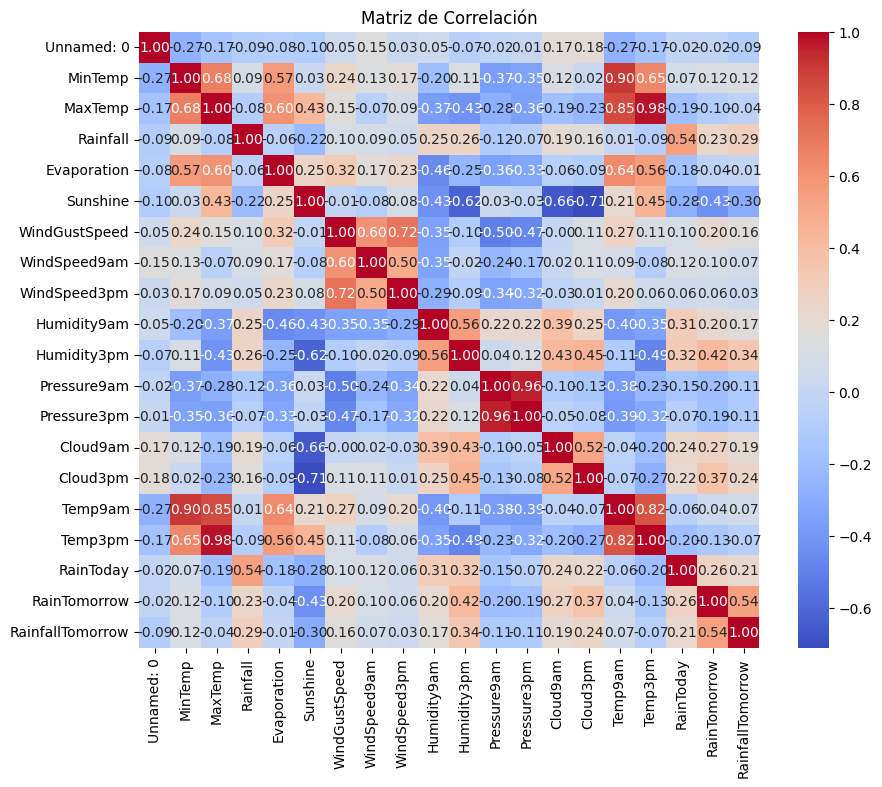

In [81]:
# Imprimimos la matriz de correlación para ver qué columnas pueden ser representativas y cuales no.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#Eliminamos columnas que no son representativas según la matriz de correlación. Para verla se deben comentar las siguientes lineas
columnas_a_eliminar = ['Temp9am', 'Temp3pm','Evaporation','WindGustSpeed','WindGustDir']
df = df.drop(columnas_a_eliminar, axis=1)

In [82]:
# Hay una correlación inversa fuerte entre Cloud9am y Cloud3pm y Sunshine. Nos puede servir para cuando alguna de estos es nula.
# Para trabajarlas con una fórmula primero deberíamos normalizar a las 3.
# Aprovechamos el for y normalizamos todas las de la lista, incluidas las 3 mencionadas en el comentario anterior.
columnas_a_normalizar = ['Sunshine','Cloud9am','Cloud3pm','Humidity9am','Humidity3pm','Pressure9am',\
                         'Pressure3pm','MinTemp','MaxTemp','Rainfall','RainfallTomorrow']
for columna in columnas_a_normalizar:
  col = df[columna]

  # Calcula el valor mínimo y máximo de la columna.
  min_value = col.min()
  max_value = col.max()

  # Realiza la normalización min-max.
  nueva_columna = columna + '_normalizada'
  df[nueva_columna] = (col - min_value) / (max_value - min_value)
  col =[]


# Ahora sí pasamos a calcular valores para completar valores nulos usando la correlación (Inversa en este caso).
# 0.69 es la media entre 0.67 y 0.71, la correlación de Cloud9am y Cloud3pm con Sunshine
correlacion_inversa = 0.69

# Asignamos el valor de uno al otro en casos que uno de los dos tenga datos
df['Cloud3pm_normalizada'].fillna(df['Cloud9am_normalizada'], inplace=True)
df['Cloud9am_normalizada'].fillna(df['Cloud3pm_normalizada'], inplace=True)

# Asignamos la inversa de Sunshine a los casos de que ni 9am ni 3pm tienen datos
df['Cloud3pm_normalizada'].fillna(1 - correlacion_inversa * df['Sunshine_normalizada'], inplace=True)
df['Cloud9am_normalizada'].fillna(1 - correlacion_inversa * df['Sunshine_normalizada'], inplace=True)

# Completamos con la inversa del promedio de 3pm y 9am cuando ambos tienen datos
df['Sunshine_normalizada'].fillna(1 - correlacion_inversa * ((df['Cloud3pm_normalizada'] + df['Cloud9am_normalizada'])/2), inplace=True)


In [83]:
# Quitamos las columnas originales no normalizadas
columnas_a_eliminar = ['Cloud9am', 'Cloud3pm','Sunshine','Humidity9am','Humidity3pm','Pressure9am',\
                       'Pressure3pm','MinTemp','MaxTemp','Rainfall','RainfallTomorrow']
df = df.drop(columnas_a_eliminar, axis=1)

<ipython-input-84-87ff8a496fa2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


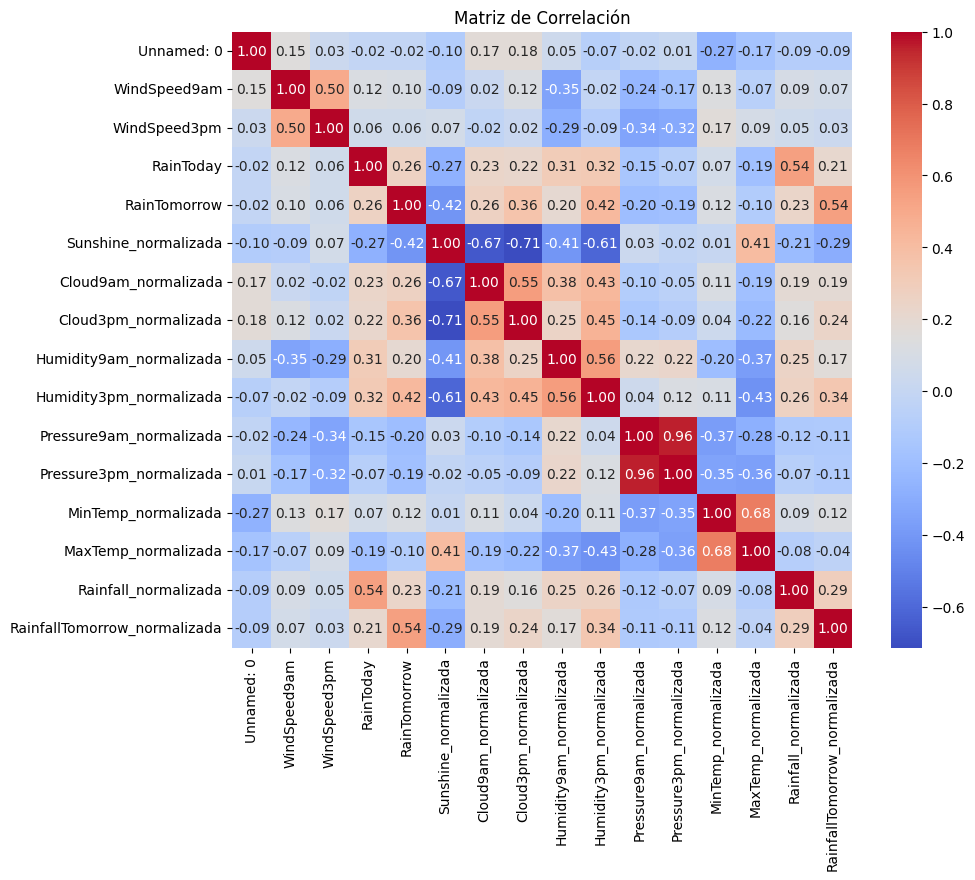

In [84]:
# Nuevamente mostramos la matriz de correlación, ahora con los valores normalizados, para seguir tomando decisiones.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [85]:
# Quitamos columnas no representativas según la matriz de correlación para el caso de WindSpeed9am y WindSpeed3pm.
# Quitmos por lógica para el caso de WindDir9am (Dejamos WindDir3pm porque es dato mas cercano en el tiempo a mañana).
# Quitamos Unnamed porque no representa nada.
columnas_a_eliminar = ['WindDir9am','WindSpeed9am','WindSpeed3pm','Unnamed: 0']
df = df.drop(columnas_a_eliminar, axis=1)


In [86]:
### Cantidad de valores faltantes de todas las columnas del dataset.

df.isna().sum()

Date                              0
Location                          0
WindDir3pm                       27
RainToday                         0
RainTomorrow                      0
Sunshine_normalizada            769
Cloud9am_normalizada            769
Cloud3pm_normalizada            769
Humidity9am_normalizada           1
Humidity3pm_normalizada           2
Pressure9am_normalizada           4
Pressure3pm_normalizada           3
MinTemp_normalizada               0
MaxTemp_normalizada               0
Rainfall_normalizada              0
RainfallTomorrow_normalizada      0
dtype: int64

In [87]:
# Lista de columnas en las que vamos a eliminar los valores nulos ya que 769 es menos del 5% de 15986.
columnas_a_eliminar_nulos = ['WindDir3pm', 'Sunshine_normalizada', 'Cloud9am_normalizada','Cloud3pm_normalizada','Humidity9am_normalizada',\
                             'Humidity3pm_normalizada','Pressure9am_normalizada','Pressure3pm_normalizada']

# Eliminar filas con valores nulos en las columnas especificadas.
df = df.dropna(subset=columnas_a_eliminar_nulos)
df.isna().sum()



Date                            0
Location                        0
WindDir3pm                      0
RainToday                       0
RainTomorrow                    0
Sunshine_normalizada            0
Cloud9am_normalizada            0
Cloud3pm_normalizada            0
Humidity9am_normalizada         0
Humidity3pm_normalizada         0
Pressure9am_normalizada         0
Pressure3pm_normalizada         0
MinTemp_normalizada             0
MaxTemp_normalizada             0
Rainfall_normalizada            0
RainfallTomorrow_normalizada    0
dtype: int64

In [88]:


norte = ['N', 'NNE', 'NE', 'ENE']
este = ['E', 'ESE', 'SE', 'SSE']
sur = ['S', 'SSW', 'SW', 'WSW']
oeste = ['W', 'WNW', 'NW', 'NNW']


def one_hot_encoding(direction):
    if direction in norte:
        return 'N'
    elif direction in este:
        return 'E'
    elif direction in sur:
        return 'S'
    elif direction in oeste:
        return 'W'
    else:
        return 'Other'


df['WindDir3pm_Encoded'] = df['WindDir3pm'].apply(one_hot_encoding)
df = pd.get_dummies(df, columns=['WindDir3pm_Encoded'], prefix='WindDir3pm')

In [89]:
df.describe()
# Vemos que ya están todas las columnas normalizadas

,RainToday,RainTomorrow,Sunshine_normalizada,Cloud9am_normalizada,Cloud3pm_normalizada,Humidity9am_normalizada,Humidity3pm_normalizada,Pressure9am_normalizada,Pressure3pm_normalizada,MinTemp_normalizada,MaxTemp_normalizada,Rainfall_normalizada,RainfallTomorrow_normalizada,WindDir3pm_E,WindDir3pm_N,WindDir3pm_S,WindDir3pm_W
count,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000,15191.000000
mean,0.239484,0.240208,0.498119,0.531887,0.593354,0.651774,0.503646,0.586022,0.583696,0.515058,0.411693,0.019602,0.019634,0.252584,0.243894,0.270621,0.232901
std,0.426783,0.427224,0.272342,0.303476,0.322955,0.175670,0.180857,0.136864,0.138477,0.147338,0.140405,0.062237,0.062254,0.434508,0.429444,0.444295,0.422694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.294964,0.222222,0.250000,0.539326,0.381443,0.495362,0.490458,0.420779,0.304450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.539568,0.666667,0.750000,0.662921,0.494845,0.589981,0.587786,0.511688,0.400468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.719424,0.777778,0.875000,0.775281,0.618557,0.679035,0.679389,0.623377,0.503513,0.008375,0.008375,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


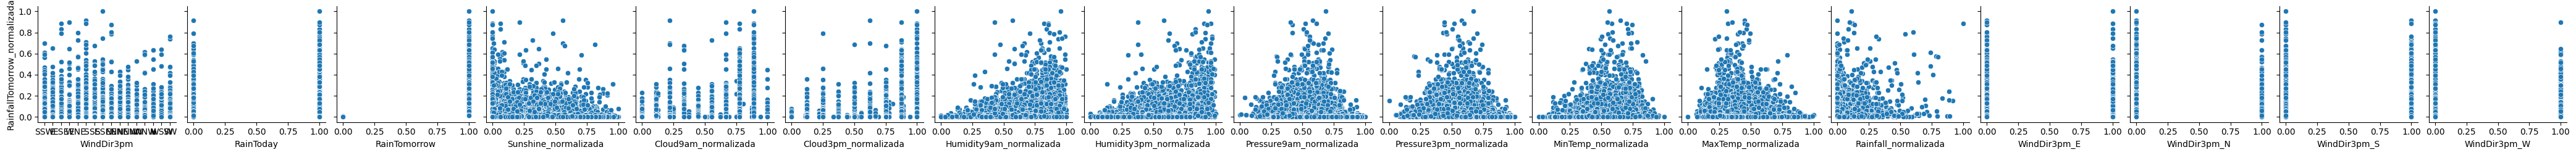

In [90]:

columnas = [col for col in df.columns if ((col != 'RainfallTomorrow_normalizada') & (col != 'Location') & (col != 'Date'))]

sns.pairplot(df, x_vars=columnas, y_vars='RainfallTomorrow_normalizada')
plt.show()

<ipython-input-91-f16ab880a0a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


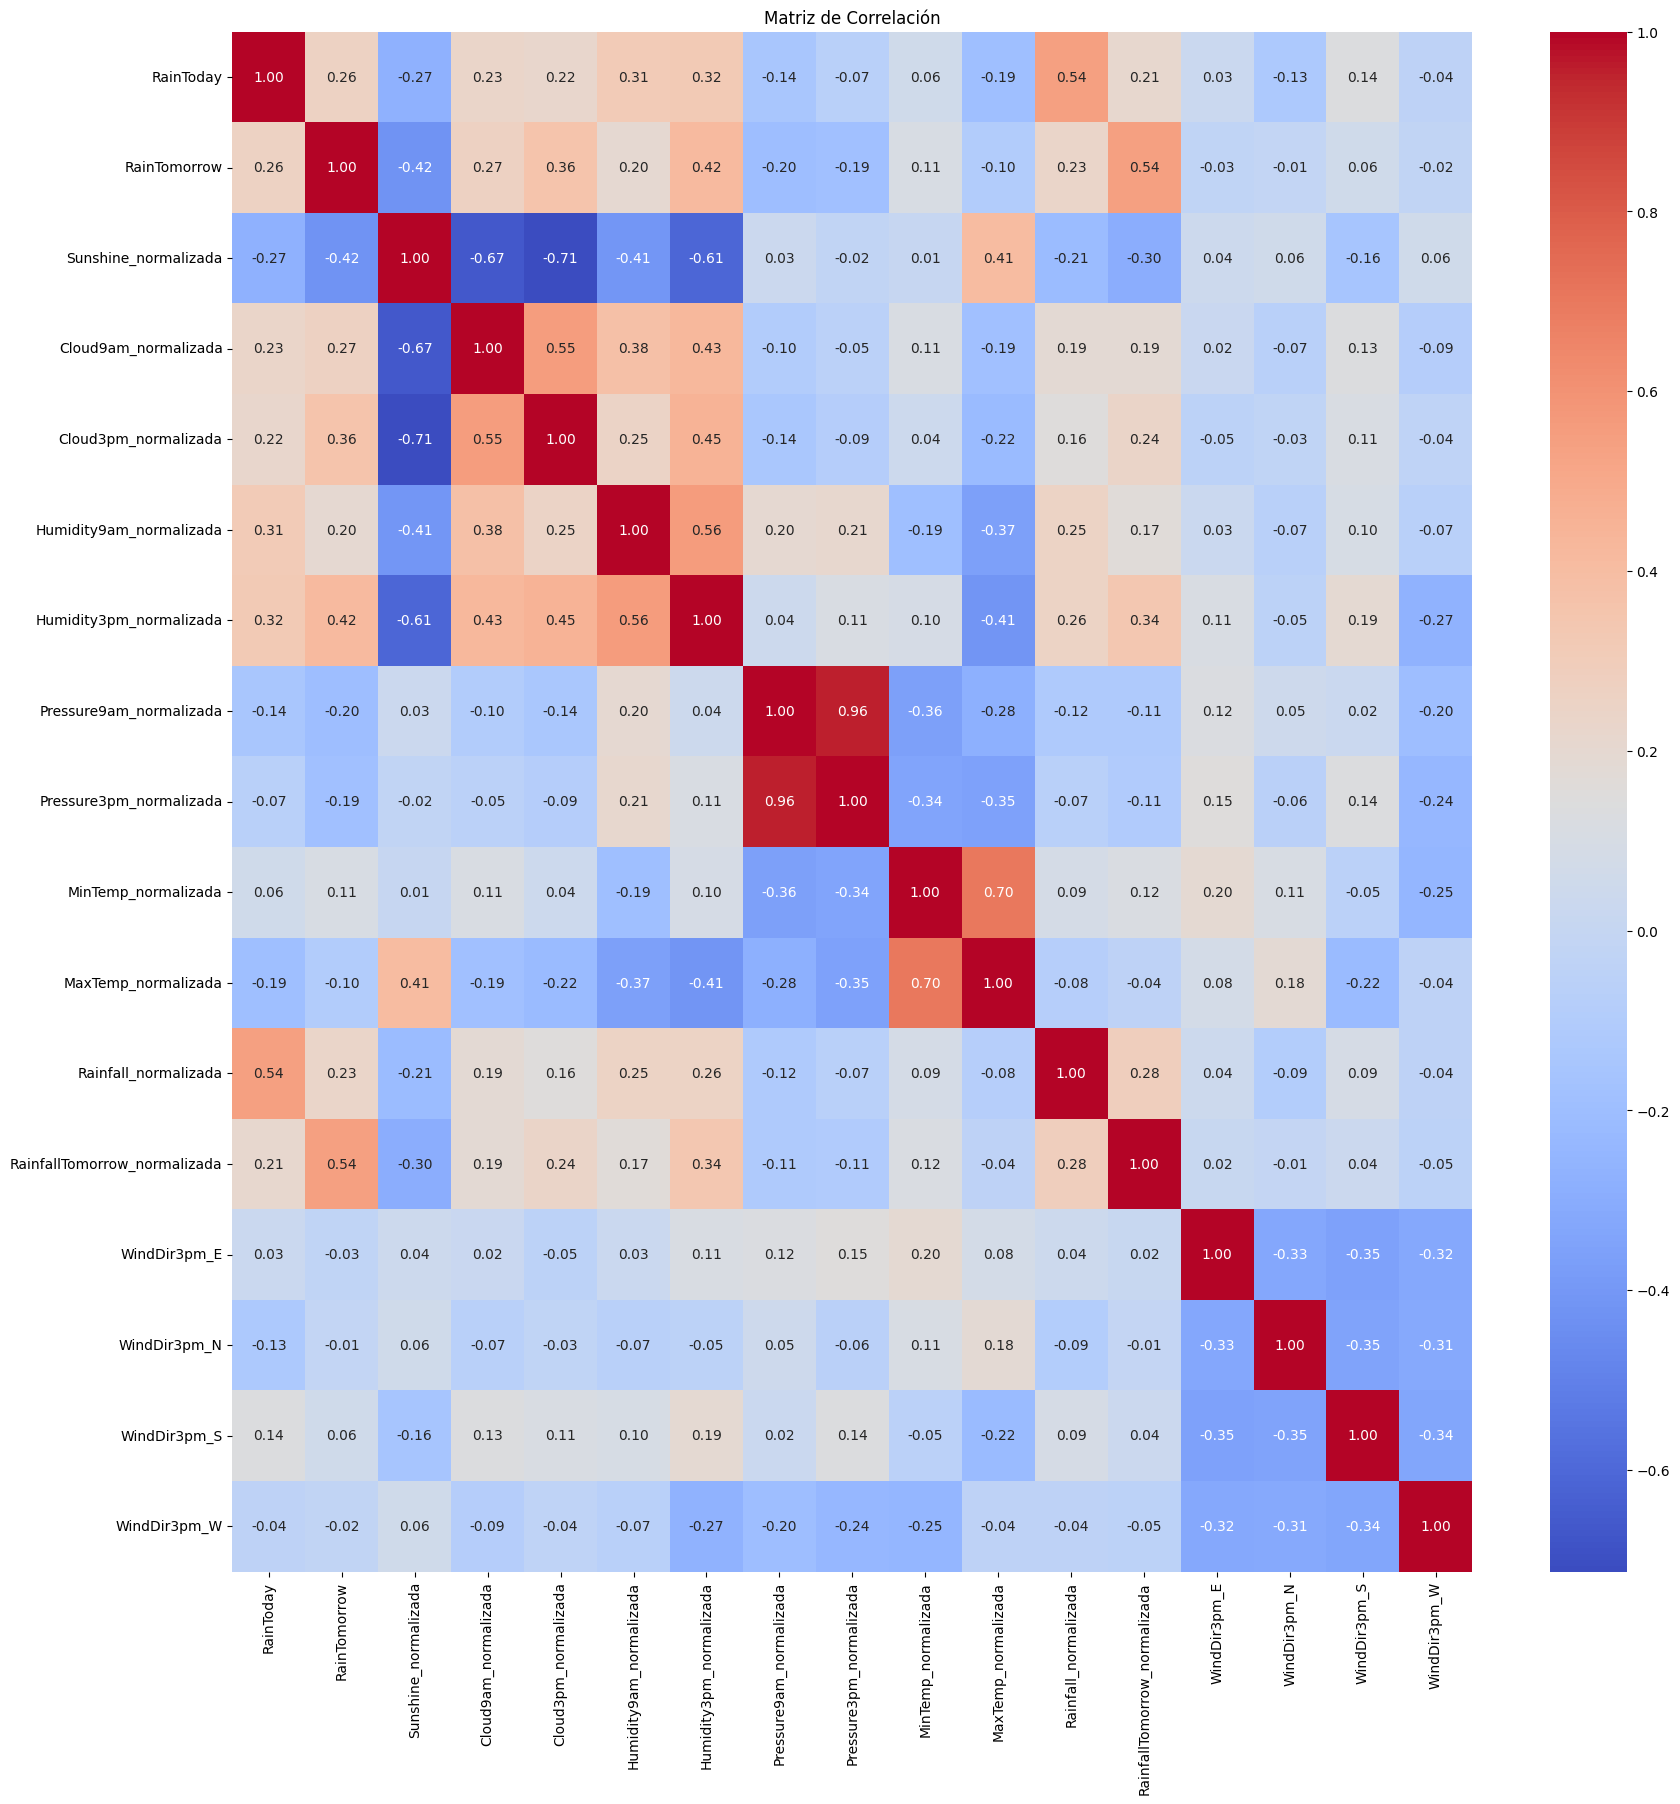

In [91]:
# Mostramos la matriz de correlación con los datos definitivos
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [92]:
# Entrenamos el modelo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['RainTomorrow', 'Cloud3pm_normalizada', 'Rainfall_normalizada','RainToday','Humidity3pm_normalizada',\
        'Pressure3pm_normalizada','MinTemp_normalizada']]
y = df['RainfallTomorrow_normalizada']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

pendiente = modelo.coef_[0]

ordenada_al_origen = modelo.intercept_


print(f"Ecuación de la recta: y = {pendiente}x + {ordenada_al_origen}")

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación (R2): {r2}")


Ecuación de la recta: y = 0.06666985540791219x + -0.025042257852264257
Error cuadrático medio: 0.0023972848591175106
Coeficiente de determinación (R2): 0.3415047962079385


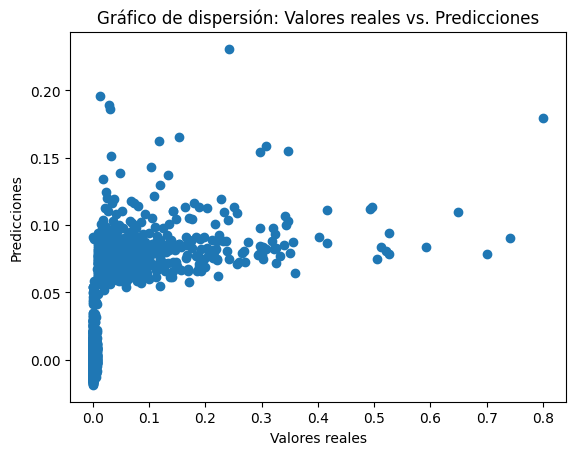

In [93]:
#Graficamos la distribución de los valores reales contra las predicciones.
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Gráfico de dispersión: Valores reales vs. Predicciones")
plt.show()

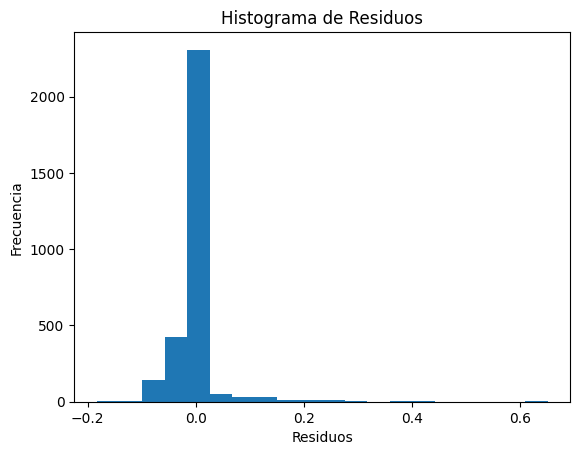

In [94]:
#Hacemos un histograma de la distribución de los residuos
residuos = y_test - y_pred
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos")
plt.show()

In [95]:
#Probamos con gradiente descendente

weights = np.zeros(X_train.shape[1])

# Hiperparámetros
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):

    predictions = np.dot(X_train, weights)


    error = y_train - predictions


    gradient = -2 * np.dot(X_train.T, error) / len(X_train)


    weights -= learning_rate * gradient


predictions_test = np.dot(X_test, weights)
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.0024697097755945066
Coeficiente de determinación (R^2): 0.3216108482885832


In [99]:
# Aplicamos regularización Lasso
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Escala tus datos, es importante para regularización.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crea un modelo de regresión Lasso.
alpha = 0.01  # Puedes ajustar el valor de alpha según tus necesidades.
lasso_model = Lasso(alpha=alpha)

# Entrena el modelo Lasso con los datos de entrenamiento.
lasso_model.fit(X_train_scaled, y_train)

# Realiza predicciones con el modelo Lasso.
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calcula las métricas de evaluación con Lasso.
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Obtén los coeficientes del modelo Lasso.
coeficientes_lasso = lasso_model.coef_


# Imprime la ecuación de la recta con Lasso.

print(f"Error cuadrático medio (Lasso): {mse_lasso}")
print(f"Coeficiente de determinación (R2) (Lasso): {r2_lasso}")

Error cuadrático medio (Lasso): 0.0025604800515063087
Coeficiente de determinación (R2) (Lasso): 0.29667772817668847


In [97]:
# Aplicamos regularización Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Valores de alpha a probar
alphas = [0.01, 0.1, 1.0, 10.0,20]

# Crear un modelo de regresión Ridge
modelo = Ridge()

# Definir la cuadrícula de búsqueda
param_grid = {'alpha': alphas}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor valor de alpha encontrado
mejor_alpha = grid_search.best_params_['alpha']

# Crear un modelo Ridge con el mejor alpha
modelo_ridge = Ridge(alpha=mejor_alpha)

# Ajustar el modelo Ridge a los datos de entrenamiento
modelo_ridge.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_ridge = modelo_ridge.predict(X_test)

# Evaluar el rendimiento del modelo Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Error cuadrático medio (Ridge): {mse_ridge}")
print(f"Coeficiente de determinación (R2) (Ridge): {r2_ridge}")

Error cuadrático medio (Ridge): 0.0023969279304621146
Coeficiente de determinación (R2) (Ridge): 0.3416028387108059


In [98]:
# Aplicamos regularización ElasticNet
from sklearn.linear_model import ElasticNet

# Crear un modelo de regresión lineal con regularización Elastic Net
modelo_elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.005)
# El valor de alpha controla la fuerza de la regularización global (combinación de L1 y L2).
# l1_ratio controla la proporción entre la regularización L1 y L2. Un valor de 0.5 equilibra ambas regularizaciones.

# Ajustar el modelo a los datos de entrenamiento
modelo_elastic_net.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_elastic_net = modelo_elastic_net.predict(X_test)

# Evaluar el rendimiento del modelo Elastic Net
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print(f"Error cuadrático medio (Elastic Net): {mse_elastic_net}")
print(f"Coeficiente de determinación (R2) (Elastic Net): {r2_elastic_net}")

Error cuadrático medio (Elastic Net): 0.003419344258818843
Coeficiente de determinación (R2) (Elastic Net): 0.06076168379297342
